In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
from tensorflow.python.keras.optimizers import SGD
from sklearn import preprocessing

print("TensorFlow version: {}".format(tf.VERSION))

TensorFlow version: 1.7.0


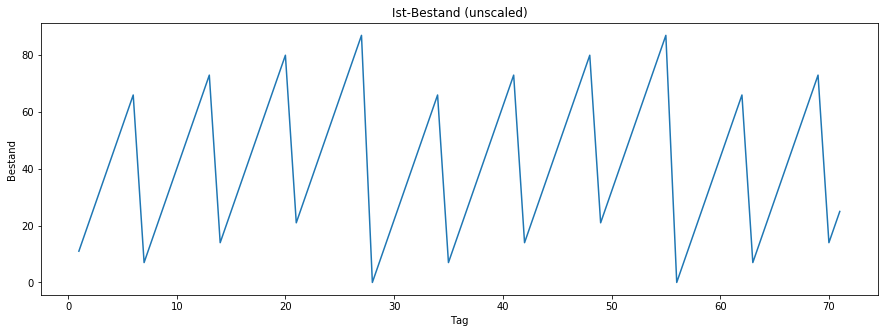

In [74]:
# Location of data files
datafilePath = "./data/Bedarfsvorhersage.csv"

# Ist-Bestandsverlauf plotten
X, Y = np.loadtxt(datafilePath, delimiter=',', skiprows=1, unpack=True)
#dataframeX = pd.read_csv(datafilePath, delimiter=',', skiprows=1, usecols=[0])
#dataframeY = pd.read_csv(datafilePath, delimiter=',', skiprows=1, usecols=[1])

# pandas DataFrame to numpy Array and reshape nD-Array to a 1D-Array for matplot
#X = dataframeX.values.reshape([dataframeX.size])
#Y = dataframeY.values.reshape([dataframeY.size])

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(X, Y)
ax.set_xlabel('Tag')
ax.set_ylabel('Bestand')
plt.title('Ist-Bestand (unscaled)')
plt.show()

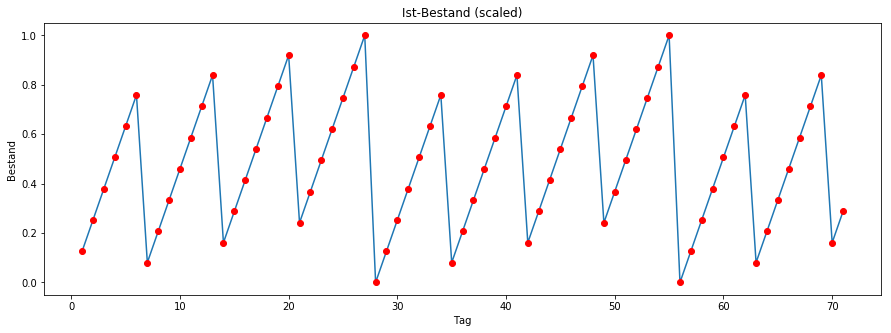

In [75]:
scaler = preprocessing.MinMaxScaler()
#X = scaler.fit_transform(X.reshape(-1,1))
Y = scaler.fit_transform(Y.reshape(-1,1))

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(X, Y)
ax.plot(X, Y, 'ro')
ax.set_xlabel('Tag')
ax.set_ylabel('Bestand')
plt.title('Ist-Bestand (scaled)')
plt.show()

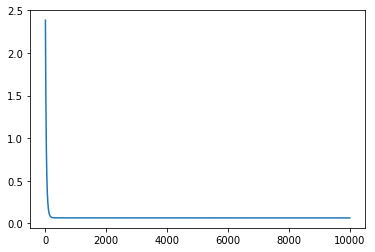

In [91]:
#Needed to use the TensorBoard tool to visualize the model training.
tbCallBack = tf.keras.callbacks.TensorBoard(log_dir='./tmp/model_graph', write_graph=True)

# Define the NN as with fully connected layers with 12 nodes each that are using the sigmoid function.
model = Sequential()
model.add(Dense(40, activation='sigmoid', kernel_initializer='uniform', input_shape=(1,)))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
sgd = SGD(0.001);
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mean_squared_error'])

H = model.fit(X, Y, epochs=10000, batch_size=50, verbose=0, validation_split=0.3, callbacks=[tbCallBack])

plt.plot(H.history['mean_squared_error'])
plt.show()

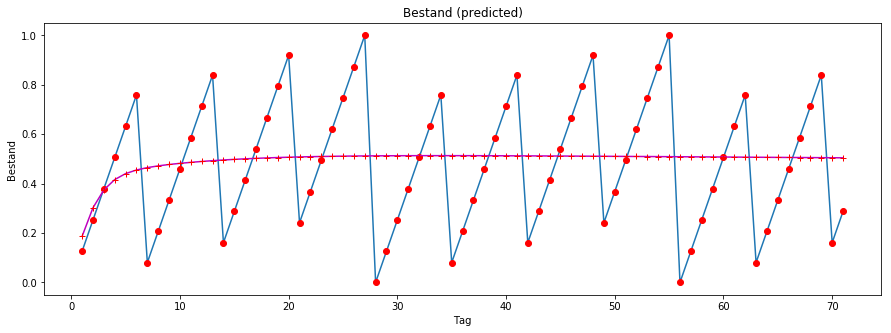

In [92]:
# Predict
X_= []
for x_ in range(0, 70):
    X_.append(x_)

Y_ = model.predict(X)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(X, Y, '')
ax.plot(X, Y, 'ro')
ax.plot(X, Y_, 'm')
ax.plot(X, Y_, 'r+')
ax.set_xlabel('Tag')
ax.set_ylabel('Bestand')
plt.title('Bestand (predicted)')
plt.show()


#plt.title('Bestandsprognose')
#plt.subplot(211)
#plt.plot(x, y)
#plt.xlabel('Tag')
#plt.ylabel('Bestand')
#plt.subplot(212)
#plt.plot(X_, Y_)
#plt.xlabel('Tag')
#plt.ylabel('Prognose')
#plt.show()
